In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [239]:
df_country =  pd.read_csv('drive/My Drive/Bootcamp Data Science Python/Final Project/Data_Negara_HELP.csv')
df_country

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [240]:
df_country.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [241]:
df_country.tail()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [242]:
df_country.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [243]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [244]:
df_country.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


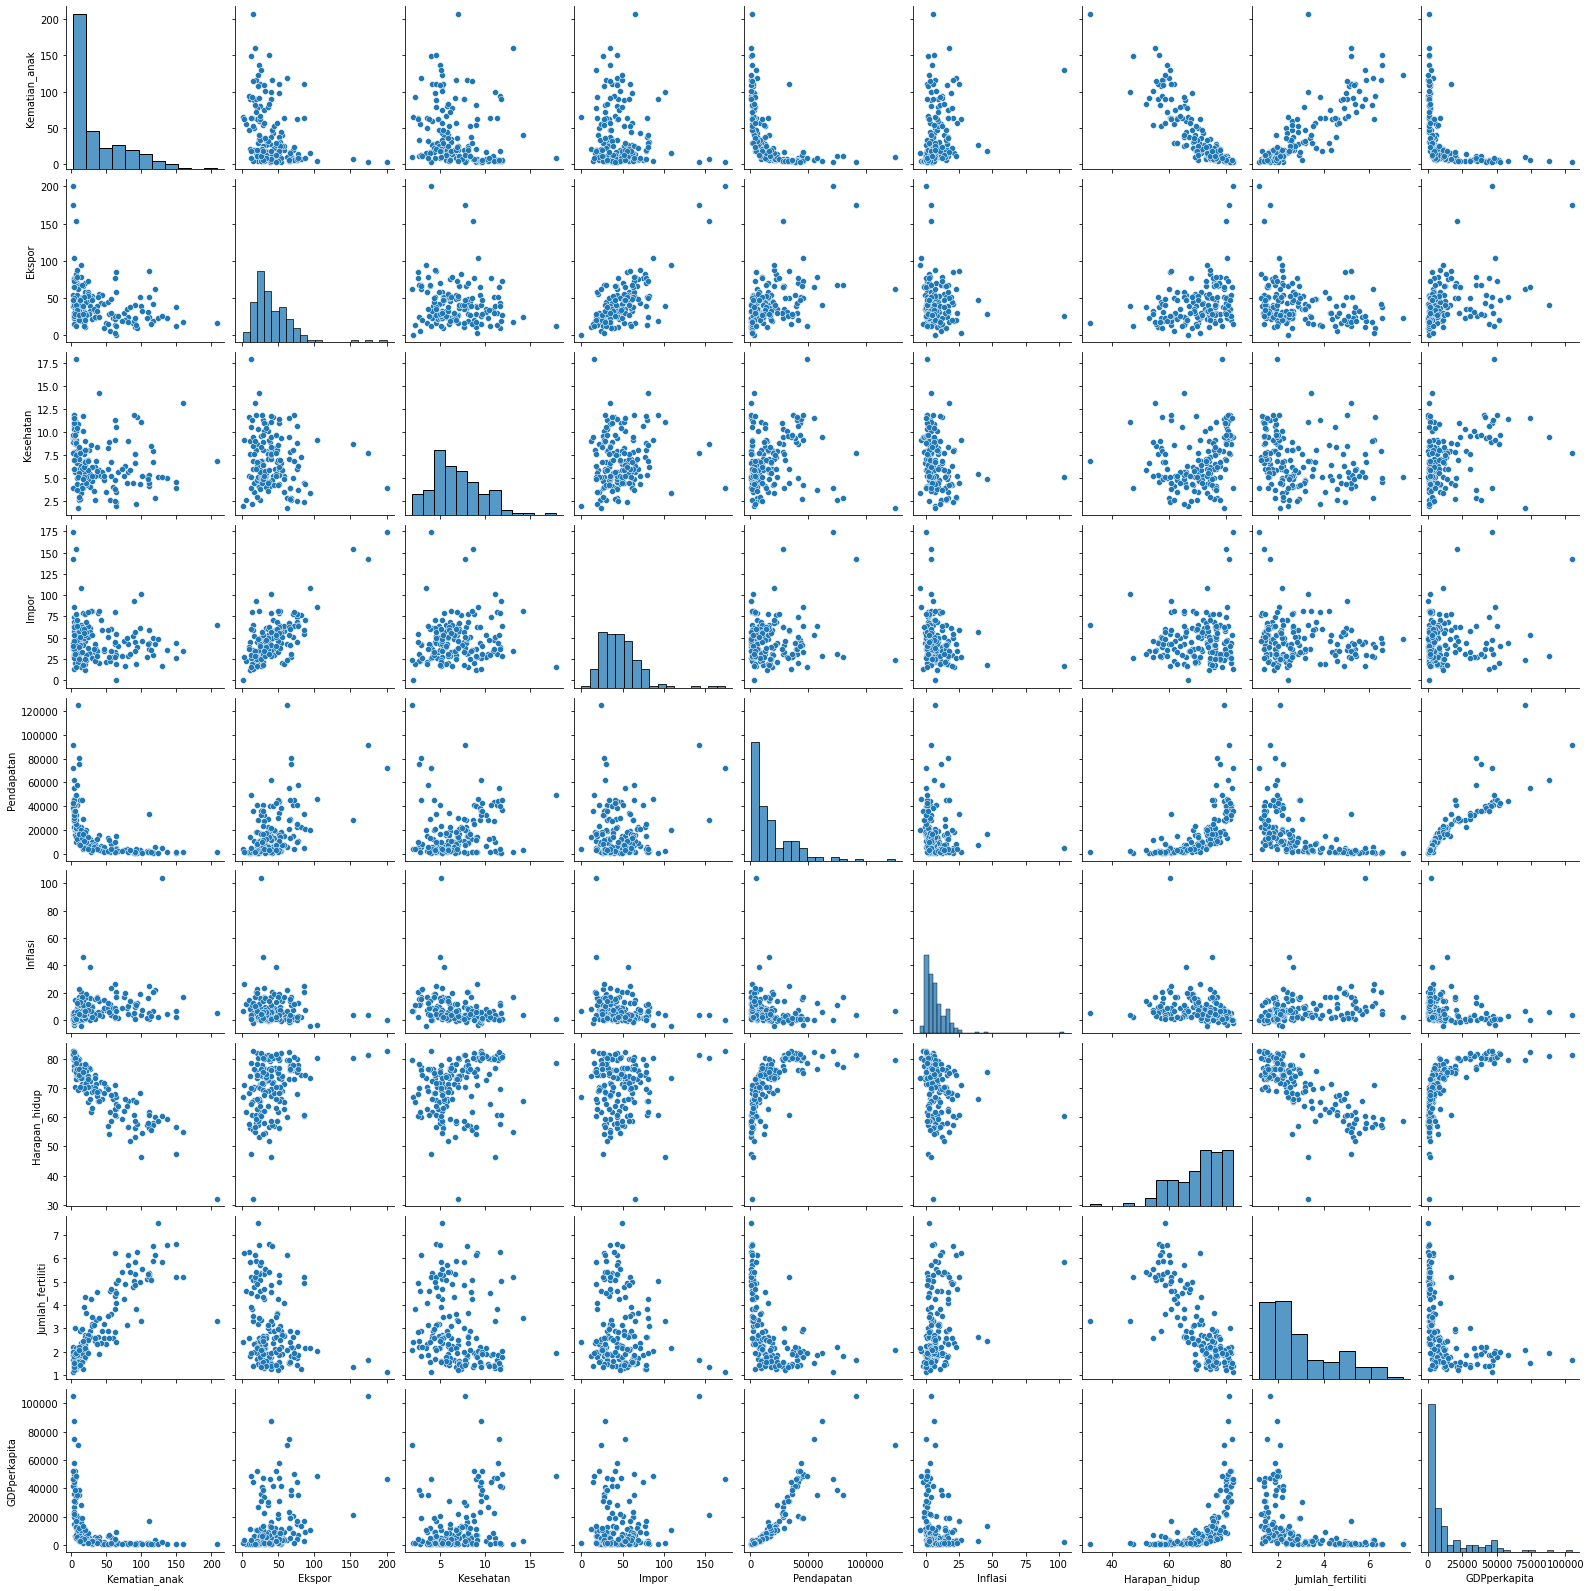

In [245]:
sns.pairplot(df_country)

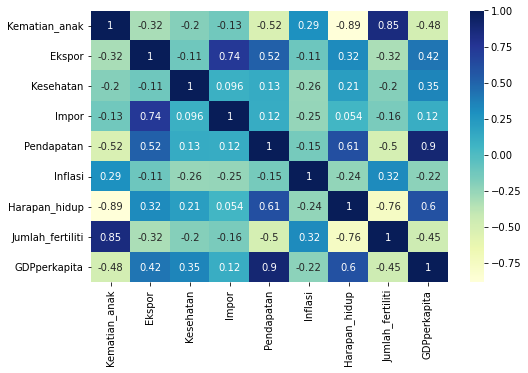

In [246]:
plt.subplots(figsize=(8,5))
dataplot = sns.heatmap(df_country.corr(), cmap="YlGnBu", annot=True)


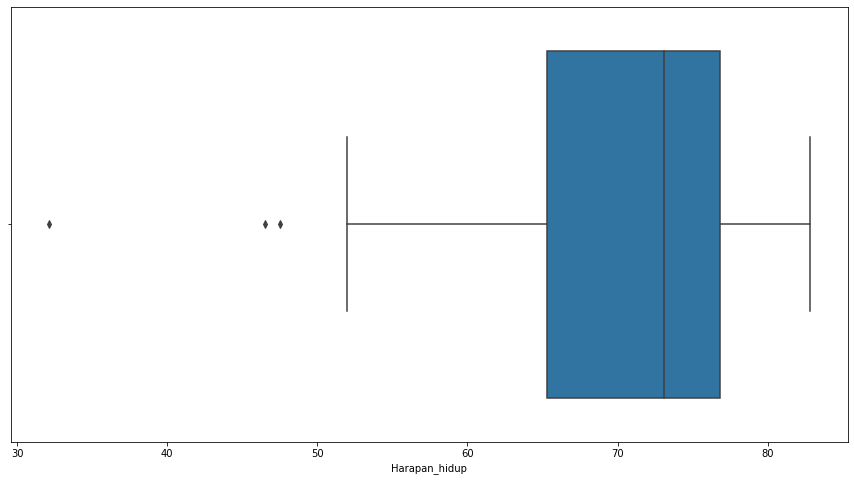

In [247]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_help_test = df_country[['Kematian_anak','Harapan_hidup','Pendapatan','GDPperkapita','Kesehatan','Jumlah_fertiliti']].copy()


plt.subplots(figsize=(15,8))
sns.boxplot(data=df_country, x=df_country['Harapan_hidup'])




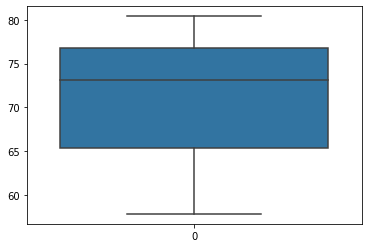

In [248]:
fifth_perc = np.percentile(df_country['Harapan_hidup'], 5)
tenth_perc = np.percentile(df_country['Harapan_hidup'], 10)
nineteeth_perc = np.percentile(df_country['Harapan_hidup'], 90)
nintyfifth_perc = np.percentile(df_country['Harapan_hidup'], 95)

df_country_fixed = np.where(df_country['Harapan_hidup'] < tenth_perc, tenth_perc, df_country['Harapan_hidup'])
df_country_fixed = np.where(df_country_fixed > nineteeth_perc, nineteeth_perc, df_country_fixed)

sns.boxplot(data=df_country_fixed)


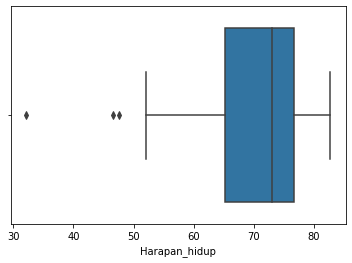

In [249]:
sns.boxplot(data=df_help_test, x=df_help_test['Harapan_hidup'])


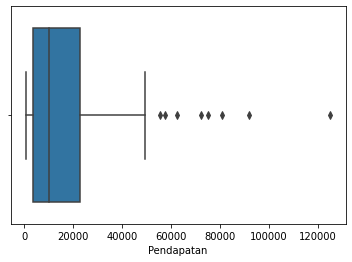

In [250]:
sns.boxplot(data=df_country, x=df_country['Pendapatan'])


In [13]:
df_country.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [43]:
df_country.loc[df_country['Pendapatan'] > 48289.0]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400


In [72]:
print(df_country['Pendapatan'].quantile(0.05)) 
print(df_country['Pendapatan'].quantile(0.95)) 
print(np.percentile(df_country['Pendapatan'], 5))

1213.0
48289.999999999956
1213.0


In [251]:
fifth_perc = np.percentile(df_country['Pendapatan'], 5)
tenth_perc = np.percentile(df_country['Pendapatan'], 10)
nineteeth_perc = np.percentile(df_country['Pendapatan'], 90)
nintyfifth_perc = np.percentile(df_country['Pendapatan'], 95)

df_country_rem = np.where(df_country['Pendapatan'] < tenth_perc, tenth_perc, df_country['Pendapatan'])
df_country_rem = np.where(df_country_rem > nineteeth_perc, nineteeth_perc, df_country_rem)

In [39]:

df_country_rem.describe()

,0
count,167.000000
mean,11458.985629
std,13873.475529
min,593.800000
25%,1330.000000
50%,4660.000000
75%,14050.000000
max,41840.000000


In [25]:
df_country_rem.loc[df_country_rem['Pendapatan'] > 48610.0]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita


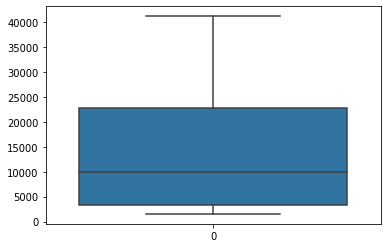

In [252]:
sns.boxplot(data=df_country_rem)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


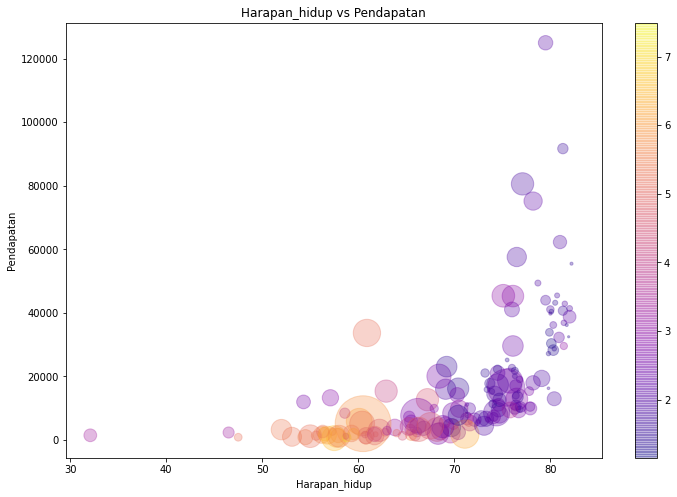

In [60]:
df_std = sc.fit_transform(df_help_test)


plt.figure(figsize=(12,8))

plt.scatter(df_country['Harapan_hidup'], df_country['Pendapatan'], c=df_country['Jumlah_fertiliti'], s=df_country['Inflasi']*30, cmap = 'plasma', alpha=0.3)
#sns.regplot(x = "Harapan_hidup", y = "GDPperkapita", data = df_help_test, scatter=False, color='black', truncate=True)


plt.title('Harapan_hidup vs Pendapatan',fontsize=12)
plt.xlabel('Harapan_hidup')
plt.ylabel('Pendapatan')
cb= plt.colorbar()

plt.show()

In [111]:
# Handling outlier
outliers = []

# Mencari lower dan upper bound
def get_lower_upper(x):
  Q1 = np.percentile(x, 25)
  Q3 = np.percentile(x, 75)

  IQR = Q3 - Q1

  lowerBound = Q1 - (1.5 * IQR)
  upperBound = Q3 + (1.5 * IQR)
  return lowerBound, upperBound

# Mencari IQR
def get_outlier_iqr(x):
  lowerBound, upperBound = get_lower_upper(x)
  return x[np.where((x < lowerBound) | (x > upperBound))]

print(get_outlier_iqr(df_country['Pendapatan'].values))
print(get_outlier_iqr(df_country['Harapan_hidup'].values))


[ 80600  75200  91700  62300 125000  72100  55500  57600]
[47.5 32.1 46.5]


In [318]:
Pendapatan_mean = df_country['Pendapatan'].mean()
Pendapatan_std = df_country['Pendapatan'].std()
low= Pendapatan_mean -(3 * Pendapatan_std)
high= Pendapatan_mean + (3 * Pendapatan_std)
Pendapatan_outliers = df_country[(df_country['Pendapatan'] < low) | (df_country['Pendapatan'] > high)]
Pendapatan_outliers.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita


In [319]:
Harapan_hidup_mean = df_country['Harapan_hidup'].mean()
Harapan_hidup_std = df_country['Harapan_hidup'].std()
low= Harapan_hidup_mean -(3 * Harapan_hidup_std)
high= Harapan_hidup_mean + (3 * Harapan_hidup_std)
Harapan_hidup_outliers = df_country[(df_country['Harapan_hidup'] < low) | (df_country['Harapan_hidup'] > high)]
Harapan_hidup_outliers.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita


In [320]:
Q1_ph = df_country['Pendapatan'].quantile(0.25)
Q3_ph = df_country['Pendapatan'].quantile(0.75)
IQR_ph = Q3_ph - Q1_ph
whisker_width = 1.5
lower_whisker = Q1_ph -(whisker_width*IQR_ph)
upper_whisker = Q3_ph + (whisker_width*IQR_ph)
df_country['Pendapatan']=np.where(df_country['Pendapatan']>upper_whisker,upper_whisker,np.where(df_country['Pendapatan']<lower_whisker,lower_whisker,df_country['Pendapatan']))

In [321]:
Q1_hh = df_country['Harapan_hidup'].quantile(0.25)
Q3_hh = df_country['Harapan_hidup'].quantile(0.75)
IQR_hh = Q3_hh - Q1_hh
whisker_width = 1.5
lower_whisker = Q1_hh -(whisker_width*IQR_hh)
upper_whisker = Q3_hh + (whisker_width*IQR_hh)
df_country['Harapan_hidup']=np.where(df_country['Harapan_hidup']>upper_whisker,upper_whisker,np.where(df_country['Harapan_hidup']<lower_whisker,lower_whisker,df_country['Harapan_hidup']))

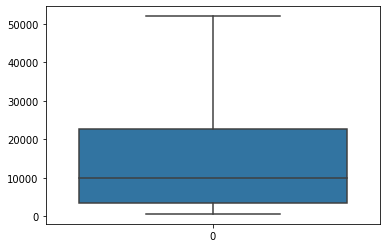

In [257]:
sns.boxplot(data=df_country['Pendapatan'])

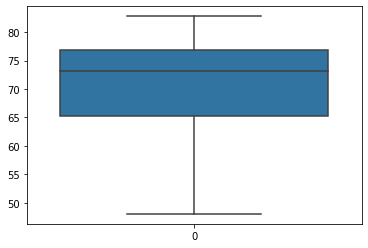

In [258]:
sns.boxplot(data=df_country['Harapan_hidup'])

In [259]:
df_country.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,15921.574850,7.781832,70.663772,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,15207.197459,10.570704,8.522535,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,48.050000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,51967.500000,104.000000,82.800000,7.490000,105000.000000


In [323]:
df_cluster = df_country[['Pendapatan','Harapan_hidup']].copy()

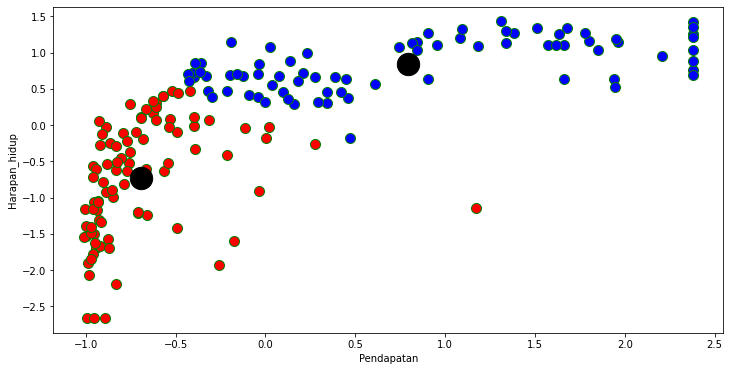

In [324]:
sc = StandardScaler()
df_cluster_std = sc.fit_transform(df_cluster)

# Clustering K-Means, k=2

c_kmeans = KMeans(n_clusters=2, random_state=42).fit(df_cluster_std)
c_labels = c_kmeans.labels_

new_df = pd.DataFrame(data = df_cluster_std, columns=['Pendapatan','Harapan_hidup'])
new_df['label_kmeans'] = c_labels

plt.subplots(figsize=(12,6))
plt.scatter(new_df.Pendapatan[new_df.label_kmeans == 0], new_df['Harapan_hidup'][new_df.label_kmeans == 0], c='b',s=100, edgecolor='g')
plt.scatter(new_df.Pendapatan[new_df.label_kmeans == 1], new_df['Harapan_hidup'][new_df.label_kmeans == 1], c='r',s=100, edgecolor='g')

center = c_kmeans.cluster_centers_
plt.scatter(center[:,0], center[:,1], c='black', s=500)
plt.xlabel('Pendapatan')
plt.ylabel('Harapan_hidup')
plt.show()

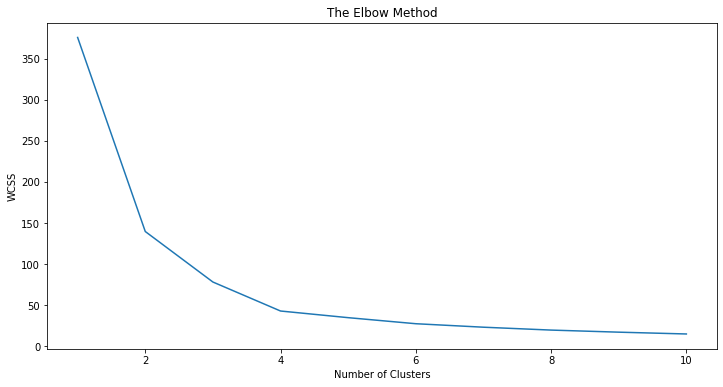

In [325]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(new_df)
  wcss.append(kmeans.inertia_)

plt.subplots(figsize=(12,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

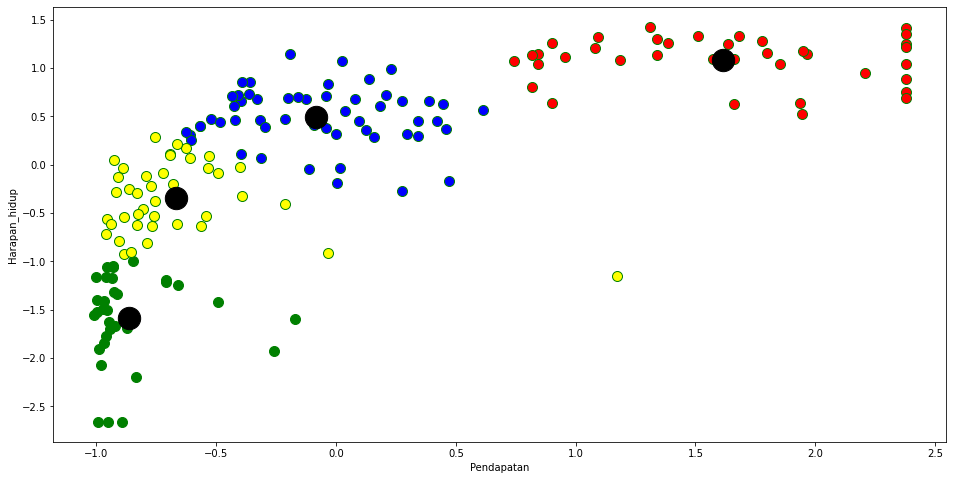

In [326]:
# K-Means, k=4

c_kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(df_cluster_std)
c_labels2 = c_kmeans_4.labels_

new_df['label_kmeans_2'] = c_labels2

plt.subplots(figsize=(16,8))
plt.scatter(new_df.Pendapatan[new_df.label_kmeans_2 == 0], new_df['Harapan_hidup'][new_df.label_kmeans_2 == 0], c='g',s=100, edgecolor='g')
plt.scatter(new_df.Pendapatan[new_df.label_kmeans_2 == 1], new_df['Harapan_hidup'][new_df.label_kmeans_2 == 1], c='b',s=100, edgecolor='g')
plt.scatter(new_df.Pendapatan[new_df.label_kmeans_2 == 2], new_df['Harapan_hidup'][new_df.label_kmeans_2 == 2], c='r',s=100, edgecolor='g')
plt.scatter(new_df.Pendapatan[new_df.label_kmeans_2 == 3], new_df['Harapan_hidup'][new_df.label_kmeans_2 == 3], c='yellow',s=100, edgecolor='g')

center = c_kmeans_4.cluster_centers_
plt.scatter(center[:,0], center[:,1], c='black', s=500)
plt.xlabel('Pendapatan')
plt.ylabel('Harapan_hidup')
plt.show()

In [327]:
new_df

,Pendapatan,Harapan_hidup,label_kmeans,label_kmeans_2
0,-0.943936,-1.702225,1,0
1,-0.395181,0.663321,0,1
2,-0.199291,0.686859,0,1
3,-0.660984,-1.243238,1,0
4,0.209637,0.722166,0,1
...,...,...,...,...
162,-0.855555,-0.901941,1,3
163,0.038151,0.557401,0,1
164,-0.753982,0.286717,1,3
165,-0.754642,-0.372341,1,3


In [328]:
ddd = df_country.copy()
ddd['cluster'] = c_labels2
df_country.loc[df_country['Negara'] == 'Haiti']
ddd.loc[ddd['Negara'] == 'Haiti']

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster
66,Haiti,142.875,15.3,6.91,64.7,1500.0,5.45,48.05,3.33,662.0,0


In [329]:
ddd

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,3
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0,1
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,3
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,3


In [330]:
print(ddd['Pendapatan'].mean())
print(ddd['Harapan_hidup'].mean())
print(ddd['Inflasi'].mean())
print(ddd['Kematian_anak'].mean())
print(ddd['GDPperkapita'].mean())

15921.574850299401
70.66377245508981
7.781832335329342
37.69820359281437
10351.281437125748


In [331]:
x = ddd[ddd.cluster == 3]
x

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster
12,Bangladesh,49.4,16.000,3.52,21.8000,2440.0,7.140,70.4,2.33,758.0,3
16,Belize,18.8,58.200,5.20,57.5000,7880.0,1.140,71.4,2.71,4340.0,3
18,Bhutan,42.7,42.500,5.20,70.7000,6420.0,5.990,72.1,2.38,2180.0,3
19,Bolivia,46.6,41.200,4.84,34.3000,5410.0,8.780,71.6,3.20,1980.0,3
27,Cambodia,44.4,54.100,5.68,59.5000,2520.0,3.120,66.1,2.88,786.0,3
30,Cape Verde,26.5,32.700,4.09,61.8000,5830.0,0.505,72.5,2.67,3310.0,3
36,Comoros,88.2,16.500,4.51,51.7000,1410.0,3.870,65.9,4.75,769.0,3
47,Egypt,29.1,21.300,4.66,26.6000,9860.0,10.100,70.5,3.19,2600.0,3
49,Equatorial Guinea,111.0,85.800,4.48,58.9000,33700.0,24.900,60.9,5.21,17100.0,3
52,Fiji,24.1,57.800,4.86,63.9000,7350.0,4.230,65.3,2.67,3650.0,3


In [332]:
x = ddd[ddd.cluster == 2]
x[ (x.GDPperkapita < (ddd['GDPperkapita'].mean())) & (x.Kematian_anak > (ddd['Kematian_anak'].mean())) ].sort_values(by=['GDPperkapita'],ascending=True).head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster


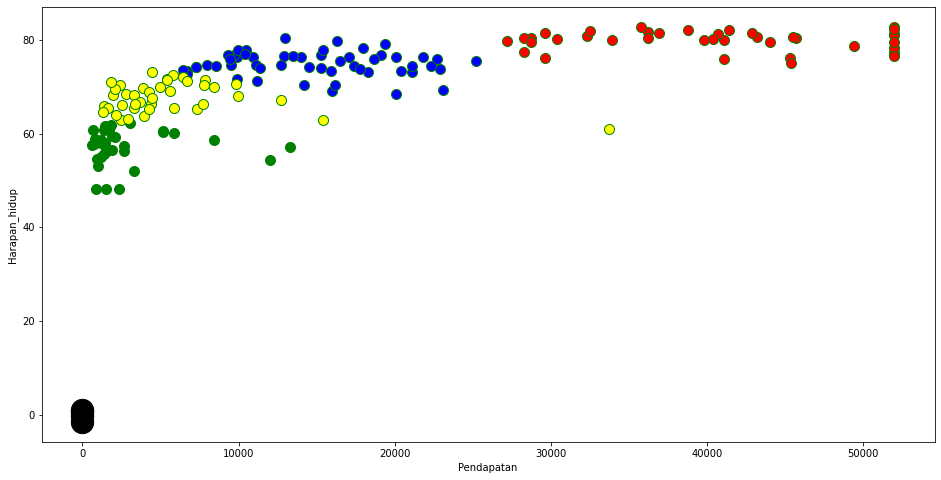

In [333]:
plt.subplots(figsize=(16,8))
plt.scatter(ddd.Pendapatan[ddd.cluster == 0], ddd['Harapan_hidup'][ddd.cluster == 0], c='g',s=100, edgecolor='g')
plt.scatter(ddd.Pendapatan[ddd.cluster == 1], ddd['Harapan_hidup'][ddd.cluster == 1], c='b',s=100, edgecolor='g')
plt.scatter(ddd.Pendapatan[ddd.cluster == 2], ddd['Harapan_hidup'][ddd.cluster == 2], c='r',s=100, edgecolor='g')
plt.scatter(ddd.Pendapatan[ddd.cluster == 3], ddd['Harapan_hidup'][ddd.cluster == 3], c='yellow',s=100, edgecolor='g')

center = c_kmeans_4.cluster_centers_
plt.scatter(center[:,0], center[:,1], c='black', s=500)
plt.xlabel('Pendapatan')
plt.ylabel('Harapan_hidup')
plt.show()